In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
sns.set_style("whitegrid")

# Euclidean Distance

In [2]:
def euclideanDistance (x1,y1):
    return np.sqrt(np.sum((x1-y1)**2))

In [3]:
p1=pd.Series([1,2,3])
p2=pd.Series([4,5,6])
print(np.sqrt((1-4)**2 + (2-5)**2 + (3-6)**2))

5.196152422706632


In [4]:
euclideanDistance(p1,p2)

5.196152422706632

In [5]:
from scipy.spatial.distance import euclidean
euclidean(p1,p2)

5.196152422706632

# Centroid

In [6]:
def centroid(x2):
    return np.array(np.sum(x2,axis=0)/len(x2))

In [7]:
sample=pd.DataFrame(np.array([[1,2,3],
                              [7,2,3],
                              [1,1,1],
                              [3,4,6]]))
sample

,0,1,2
0,1,2,3
1,7,2,3
2,1,1,1
3,3,4,6


In [8]:
centroid(sample)

array([3.  , 2.25, 3.25])

# Find the Closest Cluster

In [9]:
def closestCluster (sample, clusterCenter):
    distance=np.array([])
    for point in np.array(clusterCenter):
        distance=np.append(distance,euclideanDistance(sample,point))
    #print("The distances Compared with CC is:",distance)
    return np.min(distance),np.argmin(distance)

In [10]:
sample=pd.Series([1,1,1])
clusterCenter = pd.DataFrame(np.array([[1,-1,3],
                                       [0,3,1.5],
                                       [3,4,6]]))

In [11]:
minDist,label=closestCluster(sample,clusterCenter)

In [12]:
print("The Smallest Distance is ",minDist)
print("The Index/Label for the point is ",label)

The Smallest Distance is  2.29128784747792
The Index/Label for the point is  1


# Closest Cluster for Multiple points

In [13]:
def closestClusterMultiple(X,clusterCenter):
    distArray=np.array([])
    labelArray=np.array([])
    for i in np.array(X):
        minDist,label=closestCluster(i,clusterCenter)
        distArray=np.append(distArray,minDist)
        labelArray=np.append(labelArray,label)
    X["distance"]=distArray
    X["label"]=labelArray
    return X

In [14]:
X=pd.DataFrame([np.array([1,2,3]),np.array([4,5,6]),np.array([-3,-8,9]),
               np.array([-10,-1,-5]),np.array([3,3,3])])
clusterCenter = pd.DataFrame(np.array([[1,-1,3],
                                       [0,3,1.5],
                                       [3,4,6]]))

In [15]:
closestClusterMultiple(X,clusterCenter)

,0,1,2,distance,label
0,1,2,3,2.061553,1.0
1,4,5,6,1.414214,2.0
2,-3,-8,9,10.049876,0.0
3,-10,-1,-5,12.579746,1.0
4,3,3,3,3.162278,2.0


# K Means Clustering

In [16]:
def bharath_kmeans(X,k,nIteration=5):
    xrows,yrows=X.shape
    colnames=X.columns
    clusterCent=X.sample(n=k,replace=False)
    X=closestClusterMultiple(X,clusterCent)
    
    for i in range(nIteration):
        clusterCent=np.array([])
        lab=X["label"]
        X.drop(["distance","label"],axis=1,inplace=True)
        
        for j in range(k):
            cen=centroid(X[lab==j].values)
            clusterCent=np.append(clusterCent,cen)
        clusterCent=clusterCent.reshape(k,yrows)
        X=closestClusterMultiple(X,clusterCent)
    
    colnames=np.append(colnames,["distance","label"])
    X.label = X.label.astype(int)
    X.columns=colnames
    return X

In [17]:
X=pd.DataFrame([np.array([1,2,3]),np.array([4,5,6]),np.array([7,8,9])])
X

,0,1,2
0,1,2,3
1,4,5,6
2,7,8,9


In [18]:
bharath_kmeans(X,2)

,0,1,2,distance,label
0,1,2,3,0.000000,0
1,4,5,6,2.598076,1
2,7,8,9,2.598076,1


In [19]:
from sklearn.datasets import make_blobs
data = make_blobs(n_samples=200, n_features=2, 
                  centers=3, cluster_std=1.6, random_state=50)

In [20]:
X=pd.DataFrame(data[0],columns=["x","y"])
X.tail()

,x,y
195,-0.688657,-9.551810
196,-3.747068,-0.024997
197,-1.324360,-9.349883
198,-2.927345,10.343299
199,-2.611918,8.779773


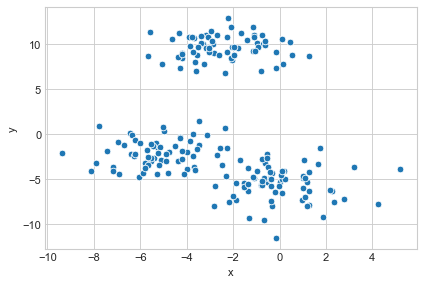

In [21]:
plt.figure(dpi=80)
sns.scatterplot(x="x",y="y",data=X)
plt.show()

In [22]:
answer=bharath_kmeans(X,3)

In [23]:
answer.tail()

,x,y,distance,label
195,-0.688657,-9.551810,4.070739,1
196,-3.747068,-0.024997,2.497951,0
197,-1.324360,-9.349883,4.038580,1
198,-2.927345,10.343299,0.820411,2
199,-2.611918,8.779773,0.926712,2


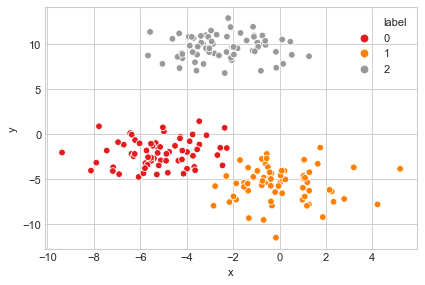

In [24]:
plt.figure(dpi=80)
sns.scatterplot(x="x",y="y",hue="label",data=X,palette="Set1")
plt.show()

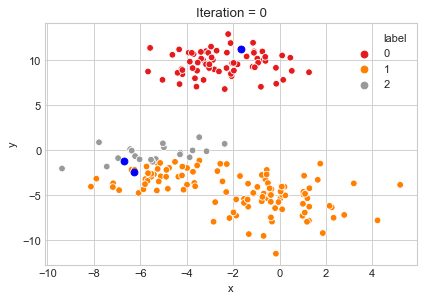

            x          y
121 -1.682108  11.284342
40  -6.292080  -2.462692
76  -6.711839  -1.168940


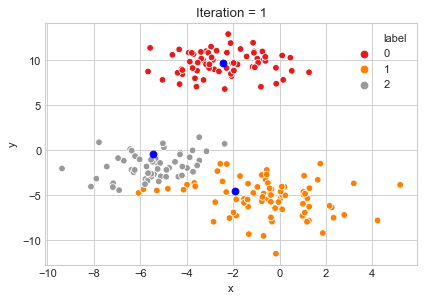

          x         y
0 -2.432474  9.688946
1 -1.940387 -4.506344
2 -5.468617 -0.400378


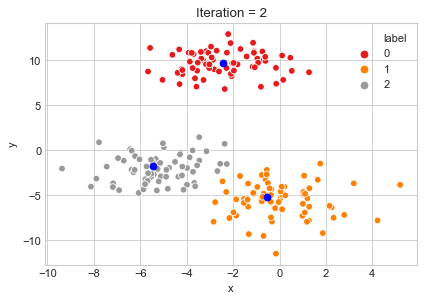

          x         y
0 -2.432474  9.688946
1 -0.560878 -5.250340
2 -5.446671 -1.742401


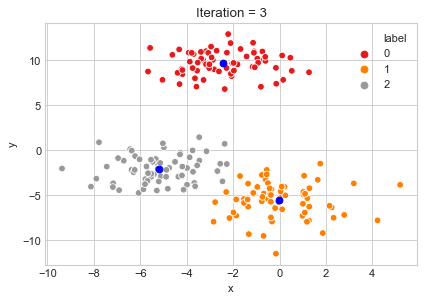

          x         y
0 -2.432474  9.688946
1 -0.006454 -5.515297
2 -5.213327 -2.055531


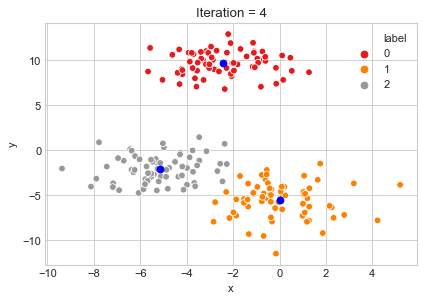

          x         y
0 -2.432474  9.688946
1  0.029088 -5.544846
2 -5.170950 -2.077391


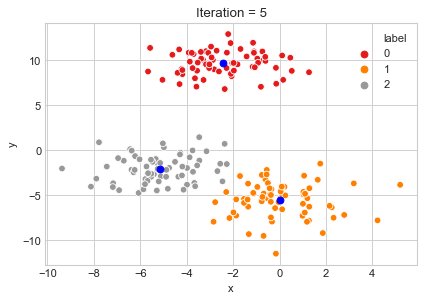

          x         y
0 -2.432474  9.688946
1  0.029088 -5.544846
2 -5.170950 -2.077391


In [58]:
from sklearn.datasets import make_blobs
data = make_blobs(n_samples=200, n_features=2, 
                  centers=3, cluster_std=1.6, random_state=50)
X=pd.DataFrame(data[0],columns=["x","y"])
def bharath_kmeans1(X,k,nIteration=5):
    xrows,yrows=X.shape
    colnames=X.columns
    clusterCent=X.sample(n=k,replace=False)
    X=closestClusterMultiple(X,clusterCent)
    colnames=np.append(colnames,["distance","label"])
    X.label = X.label.astype(int)
    X.columns=colnames
    plt.figure(dpi=80)
    sns.scatterplot(x="x",y="y",hue="label",data=X,palette="Set1")
    plt.scatter(clusterCent["x"],clusterCent["y"],c="blue")
    plt.title("Iteration = 0")
    plt.show()
    print(clusterCent)
    for i in range(nIteration):
        clusterCent=np.array([])
        lab=X["label"]
        X.drop(["distance","label"],axis=1,inplace=True)
        
        for j in range(k):
            cen=centroid(X[lab==j].values)
            clusterCent=np.append(clusterCent,cen)
        clusterCent=clusterCent.reshape(k,yrows)
        X=closestClusterMultiple(X,clusterCent)
        
        #colnames=np.append(colnames,["distance","label"])
        X.label = X.label.astype(int)
        #X.columns=colnames
        plt.figure(dpi=80)
        sns.scatterplot(x="x",y="y",hue="label",data=X,palette="Set1")
        clusterCent=pd.DataFrame(clusterCent,columns=["x","y"])
        plt.scatter(clusterCent["x"],clusterCent["y"],c="blue")
        titlename="Iteration = "+str(i+1)
        plt.title(titlename)
        plt.show()
        print(clusterCent)
    
bharath_kmeans1(X,3)